In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree,DecisionTreeClassifier

In [2]:
df=pd.DataFrame()

In [8]:
df["x1"]=[1,2,3,4,5,6,6,7,8,9]
df["x2"]=[5,3,6,8,1,9,5,8,9,2]
df["Label"]=[1,1,0,1,0,1,0,1,0,0]

In [13]:
df.head(2)

,x1,x2,Label
0,1,5,1
1,2,3,1


In [16]:
# step 1#Assign weights to all rows.
df["weights"]=1/df.shape[0]

In [18]:
df.head(2)

,x1,x2,Label,weights
0,1,5,1,0.1
1,2,3,1,0.1


<Axes: xlabel='x1', ylabel='x2'>

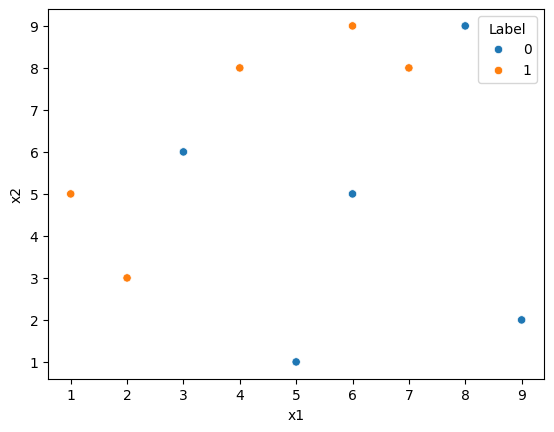

In [27]:
sns.scatterplot(x=df["x1"],y=df["x2"],hue=df["Label"])

In [28]:
df.head(2)

,x1,x2,Label,weights
0,1,5,1,0.1
1,2,3,1,0.1


In [61]:
#Step2
dtcl=DecisionTreeClassifier(max_depth=1)

In [35]:
x=df.iloc[:,0:2]
y=df.iloc[:,2]

In [37]:
dtcl.fit(x,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]')]

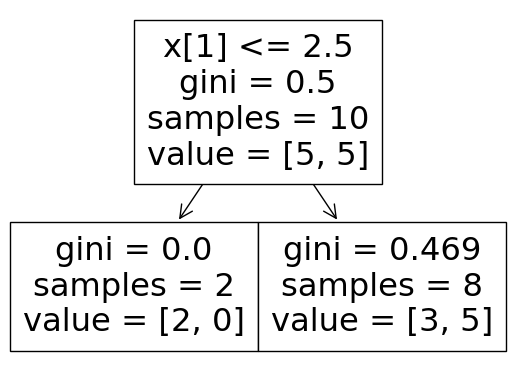

In [40]:
plot_tree(dtcl)

In [41]:
df["y_pred"]=dtcl.predict(x)

In [43]:
df

,x1,x2,Label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,1
3,4,8,1,0.1,1
4,5,1,0,0.1,0
5,6,9,1,0.1,1
6,6,5,0,0.1,1
7,7,8,1,0.1,1
8,8,9,0,0.1,1
9,9,2,0,0.1,0


#Step3

In [44]:
def calculate_error(error):
    return 1/2*np.log((1-error)/(error))

In [62]:
alpha1=calculate_error(0.3)
print(alpha1)

0.42364893019360184


In [63]:
#Step 4:
def update_rows_weight(row,alpha=0.4236):
    if row["Label"] == row["y_pred"] :
        return row["weights"]  * np.exp(-alpha) #to increase the weight
    else:
        return row["weights"] * np.exp(alpha) #to decrease the weight
        

In [66]:
df["updated_weights"]=df.apply(update_rows_weight,axis=1)

In [70]:
df["updated_weights"].sum() #it should be 1:

0.9165151400883117

In [71]:
df["normalized_wweight"]=df["updated_weights"] / df["updated_weights"].sum()

In [72]:
df

,x1,x2,Label,weights,y_pred,updated_weights,normalized_wweight
0,1,5,1,0.1,1,0.065469,0.071432
1,2,3,1,0.1,1,0.065469,0.071432
2,3,6,0,0.1,1,0.152745,0.166659
3,4,8,1,0.1,1,0.065469,0.071432
4,5,1,0,0.1,0,0.065469,0.071432
5,6,9,1,0.1,1,0.065469,0.071432
6,6,5,0,0.1,1,0.152745,0.166659
7,7,8,1,0.1,1,0.065469,0.071432
8,8,9,0,0.1,1,0.152745,0.166659
9,9,2,0,0.1,0,0.065469,0.071432


In [76]:
#Now make the range:
df["upper_cumsum"]=np.cumsum(df["normalized_wweight"])
df["lower_cumsum"]=df["upper_cumsum"] - df["normalized_wweight"]

In [77]:
df

,x1,x2,Label,weights,y_pred,updated_weights,normalized_wweight,upper_cumsum,lower_cumsum
0,1,5,1,0.1,1,0.065469,0.071432,0.071432,0.000000
1,2,3,1,0.1,1,0.065469,0.071432,0.142864,0.071432
2,3,6,0,0.1,1,0.152745,0.166659,0.309523,0.142864
3,4,8,1,0.1,1,0.065469,0.071432,0.380955,0.309523
4,5,1,0,0.1,0,0.065469,0.071432,0.452387,0.380955
5,6,9,1,0.1,1,0.065469,0.071432,0.523819,0.452387
6,6,5,0,0.1,1,0.152745,0.166659,0.690477,0.523819
7,7,8,1,0.1,1,0.065469,0.071432,0.761909,0.690477
8,8,9,0,0.1,1,0.152745,0.166659,0.928568,0.761909
9,9,2,0,0.1,0,0.065469,0.071432,1.000000,0.928568


In [95]:
#To create new datast:
def createNewDataSets(df):
    indices=[]
    for i in range(df.shape[0]):
        a=np.random.random()
        for idex,row in df.iterrows():
            if row["upper_cumsum"]  > a and a > row["lower_cumsum"]:
                indices.append(idex)
    return indices

In [96]:
index_values = createNewDataSets(df)
print(index_values)

[4, 9, 6, 6, 1, 2, 5, 1, 1, 8]


In [98]:
second_df=df.iloc[index_values,[0,1,2,3]]

In [99]:
second_df

,x1,x2,Label,weights
4,5,1,0,0.1
9,9,2,0,0.1
6,6,5,0,0.1
6,6,5,0,0.1
1,2,3,1,0.1
2,3,6,0,0.1
5,6,9,1,0.1
1,2,3,1,0.1
1,2,3,1,0.1
8,8,9,0,0.1


In [109]:
#Step2
dtcl2=DecisionTreeClassifier(max_depth=1)

In [110]:
x=df.iloc[:,0:2]
y=df.iloc[:,2]

In [111]:
dtcl2.fit(x,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]')]

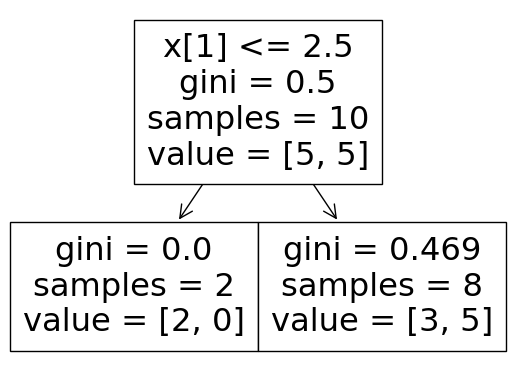

In [112]:
plot_tree(dtcl2)

In [113]:
second_df["y_pred"]=dtcl2.predict(x)

In [115]:
second_df

,x1,x2,Label,weights,y_pred
4,5,1,0,0.1,1
9,9,2,0,0.1,1
6,6,5,0,0.1,1
6,6,5,0,0.1,1
1,2,3,1,0.1,0
2,3,6,0,0.1,1
5,6,9,1,0.1,1
1,2,3,1,0.1,1
1,2,3,1,0.1,1
8,8,9,0,0.1,0


In [117]:
alpha1=calculate_error(0.6)
print(alpha1)

-0.20273255405408214


In [118]:
#Step 4:
def update_rows_weight(row,alpha=-0.2027):
    if row["Label"] == row["y_pred"] :
        return row["weights"]  * np.exp(-alpha) #to increase the weight
    else:
        return row["weights"] * np.exp(alpha) #to decrease the weight

In [120]:
second_df["updated_weights"]=second_df.apply(update_rows_weight,axis=1)

In [122]:
second_df.head(10)

,x1,x2,Label,weights,y_pred,updated_weights
4,5,1,0,0.1,1,0.081652
9,9,2,0,0.1,1,0.081652
6,6,5,0,0.1,1,0.081652
6,6,5,0,0.1,1,0.081652
1,2,3,1,0.1,0,0.081652
2,3,6,0,0.1,1,0.081652
5,6,9,1,0.1,1,0.122471
1,2,3,1,0.1,1,0.122471
1,2,3,1,0.1,1,0.122471
8,8,9,0,0.1,0,0.122471


In [123]:
second_df["normalized_wweight"]=second_df["updated_weights"] / second_df["updated_weights"].sum()

In [124]:
second_df

,x1,x2,Label,weights,y_pred,updated_weights,normalized_wweight
4,5,1,0,0.1,1,0.081652,0.083336
9,9,2,0,0.1,1,0.081652,0.083336
6,6,5,0,0.1,1,0.081652,0.083336
6,6,5,0,0.1,1,0.081652,0.083336
1,2,3,1,0.1,0,0.081652,0.083336
2,3,6,0,0.1,1,0.081652,0.083336
5,6,9,1,0.1,1,0.122471,0.124996
1,2,3,1,0.1,1,0.122471,0.124996
1,2,3,1,0.1,1,0.122471,0.124996
8,8,9,0,0.1,0,0.122471,0.124996


In [125]:
#Now make the range:
second_df["upper_cumsum"]=np.cumsum(second_df["normalized_wweight"])
second_df["lower_cumsum"]=second_df["upper_cumsum"] - second_df["normalized_wweight"]

In [126]:
second_df

,x1,x2,Label,weights,y_pred,updated_weights,normalized_wweight,upper_cumsum,lower_cumsum
4,5,1,0,0.1,1,0.081652,0.083336,0.083336,0.000000
9,9,2,0,0.1,1,0.081652,0.083336,0.166672,0.083336
6,6,5,0,0.1,1,0.081652,0.083336,0.250008,0.166672
6,6,5,0,0.1,1,0.081652,0.083336,0.333344,0.250008
1,2,3,1,0.1,0,0.081652,0.083336,0.416680,0.333344
2,3,6,0,0.1,1,0.081652,0.083336,0.500016,0.416680
5,6,9,1,0.1,1,0.122471,0.124996,0.625012,0.500016
1,2,3,1,0.1,1,0.122471,0.124996,0.750008,0.625012
1,2,3,1,0.1,1,0.122471,0.124996,0.875004,0.750008
8,8,9,0,0.1,0,0.122471,0.124996,1.000000,0.875004


In [127]:
#To create new datast:
def createNewDataSets(second_df):
    indices=[]
    for i in range(second_df.shape[0]):
        a=np.random.random()
        for idex,row in df.iterrows():
            if row["upper_cumsum"]  > a and a > row["lower_cumsum"]:
                indices.append(idex)
    return indices

In [128]:
index_values = createNewDataSets(second_df)
print(index_values)

[2, 9, 4, 8, 1, 6, 6, 5, 7, 1]


In [129]:
Third_df=df.iloc[index_values,[0,1,2,3]]

In [130]:
Third_df

,x1,x2,Label,weights
2,3,6,0,0.1
9,9,2,0,0.1
4,5,1,0,0.1
8,8,9,0,0.1
1,2,3,1,0.1
6,6,5,0,0.1
6,6,5,0,0.1
5,6,9,1,0.1
7,7,8,1,0.1
1,2,3,1,0.1
